In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np

In [2]:
# Loading data from CSV file 
LoanData=pd.read_csv("loan.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Checking the Loaded data using head, shape and info functions
LoanData.shape

(39717, 111)

In [4]:
LoanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
LoanData.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [6]:
LoanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
#Check for empty values
LoanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### Initial Data check ( Based on info and head commands)
Shape - 39717, 111

- First column has header details in the csv, hence the pd.read_csv Command is fine.
- Column names are fine as well. No action required on renaming the column names.
- Few of the columns do not have any data as all the results returned Nan from info command.
- Check for any empty rows  

In [8]:
#Deleting the columns which have empty data 
NAN_ColumnNames = [i for i in LoanData.columns if LoanData[i].isnull().sum()==LoanData.shape[0]]
NAN_ColumnNames

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [9]:
len(NAN_ColumnNames)

54

In [10]:
#Deleting above 54 empty columns from the data frame
LoanData.drop(labels=NAN_ColumnNames, axis=1,inplace=True)
LoanData.shape

(39717, 57)

In [11]:
#Check for empty values
LoanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
#dropping columns-->  mths_since_last_delinq , mths_since_last_record,next_pymnt_d as the columns have lot of null values>50%
del LoanData['mths_since_last_delinq']
del LoanData['mths_since_last_record']
del LoanData['next_pymnt_d']


In [13]:
#zip_code column data is masked and is very hard to impute these values, hence dropping zip_code column
del LoanData['zip_code']

- Based on the above output of null values, most of the columns on which we perform the analysis do not have null values, hence we are good with fixing the missing values
- Column names are fine too, do not see any repitition of the column names

In [14]:
#Changing the column data type to date format for date columns 
print(LoanData.info())
LoanData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
#Changing the term column name to term_months and int_rate column name to int_rate_percent
LoanData.rename(columns = {'term':'term_months'}, inplace = True)
LoanData.rename(columns = {'int_rate':'int_rate_percent'}, inplace = True)
LoanData.rename(columns = {'revol_util':'revol_util_percent'}, inplace = True)

In [16]:
# formating the data of column term to remove months and removing the % from the column  int_rate_percent and revol_util
LoanData["int_rate_percent"]=LoanData["int_rate_percent"].str.rstrip('%')
LoanData["term_months"]=LoanData["term_months"].str.rstrip(' months')
LoanData["revol_util_percent"]=LoanData["revol_util_percent"].str.rstrip('%')

In [17]:
# Chaning data types of columns to float and int as per the data
convert_dict = {'int_rate_percent': float,
                'revol_util_percent': float,
                'term_months': int }    
LoanData = LoanData.astype(convert_dict)  

In [18]:
LoanData[["issue_d","earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]].dtypes

issue_d               object
earliest_cr_line      object
last_pymnt_d          object
last_credit_pull_d    object
dtype: object

In [19]:
#converting data type to date for columns issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
LoanData[["issue_d","earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]] = LoanData[["issue_d", "earliest_cr_line","last_pymnt_d", "last_credit_pull_d"]].apply(pd.to_datetime,format='%b-%y')


In [20]:
LoanData[["issue_d","earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [21]:
LoanData[["issue_d","earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2016-05-01,2016-05-01


In [22]:
LoanData["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
LoanData.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term_months                            int32
int_rate_percent                     float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
url                                   object
desc                                  object
purpose                               object
title                                 object
addr_state

In [24]:
LoanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


 # Data sanity checks
 - loan_amnt should be always greater than funded_amnt
 - loan_amnt should be always greater than funded_amnt_inv
 - int_rate_percent should be greater than 0 and less than 100


In [25]:
LoanData[LoanData["loan_amnt"]<LoanData["funded_amnt"]]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [26]:
LoanData[LoanData["loan_amnt"]<LoanData["funded_amnt_inv"]]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [27]:
LoanData[LoanData["funded_amnt"]<LoanData["funded_amnt_inv"]]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [28]:
LoanData[(LoanData["int_rate_percent"]>100) | (LoanData["int_rate_percent"]<0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [29]:
LoanData["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### As the analysis is based on the loans which are fully paid or charged off and it is very hard to say about the current loans in progress
#### Hence deleting the rows with loan_status as Current 
#### Before deleting 39717 rows and total row count after deleting Current (loan_status) to be 39717-1140


In [30]:
LoanData[LoanData["loan_status"]=="Current"]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,...,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32,1065420,1299514,10000,10000,9975.00000,60,15.96,242.97,C,C5,...,242.97,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39,1069346,1304237,12500,12500,12475.00000,60,12.69,282.44,B,B5,...,282.44,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
86,1063958,1297940,14000,14000,13975.00000,60,17.27,349.98,D,D3,...,349.98,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
95,1068575,1303001,15300,15300,15275.00000,60,22.06,423.10,F,F4,...,423.10,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.00000,60,6.00,218.99,E,E3,...,218.99,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
15981,738420,935790,6000,6000,6000.00000,60,10.37,128.58,B,B3,...,128.58,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
16361,733695,930086,19200,19200,18847.76292,60,10.74,414.97,B,B4,...,414.97,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
16609,728422,924106,9350,9350,9350.00000,60,10.00,198.66,B,B2,...,198.66,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [31]:
LoanData=LoanData[~(LoanData["loan_status"]=="Current")]

In [32]:
LoanData[LoanData["loan_status"]=="Current"]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [33]:
# Expected row count after deleting rows is 38577
LoanData.shape

(38577, 53)

 #  Univariate analysis

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [36]:
LoanData_defaulters=LoanData[LoanData["loan_status"]=="Charged Off"]
LoanData_Fullpaid=LoanData[LoanData["loan_status"]=="Fully Paid"]

In [37]:
LoanData_defaulters.shape

(5627, 53)

In [38]:
LoanData_defaulters["loan_amnt"].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [39]:
LoanData_Fullpaid["loan_amnt"].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

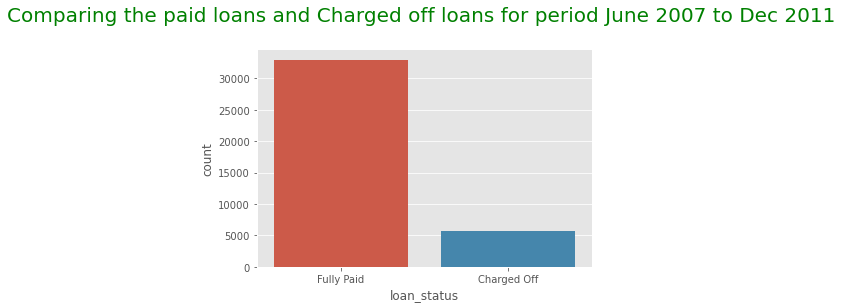

In [82]:
# Viewing the Fully paid and Charged off loans from the given data
plt.title("Comparing the paid loans and Charged off loans for period June 2007 to Dec 2011 \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
sns.countplot(data=LoanData, x='loan_status', order=LoanData.loan_status.value_counts().index)
plt.show()


#### Univariate Analysis (ordered categorical variable)- Loan applications distribution over grade for charged off loans 

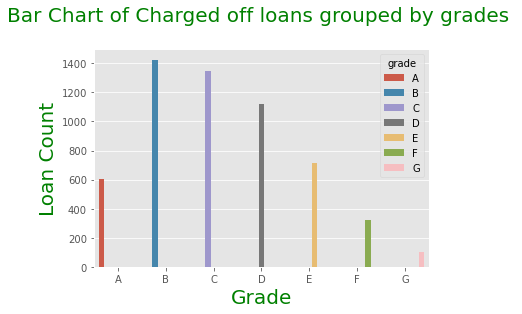

In [84]:
#Bar chart for count of Charged off loans based on grades

Loandata_defaulters_grades=LoanData_defaulters.groupby(['grade']).agg(count_total=("loan_status",'count'))
Loandata_defaulters_grades.reset_index(inplace=True)
sns.barplot(data=Loandata_defaulters_grades, x= "grade", y= "count_total",hue="grade")
plt.title("Bar Chart of Charged off loans grouped by grades \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Grade",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()


#### Univariate Analysis (ordered categorical variable)- Loan applications distribution over verification status for charged off loans 

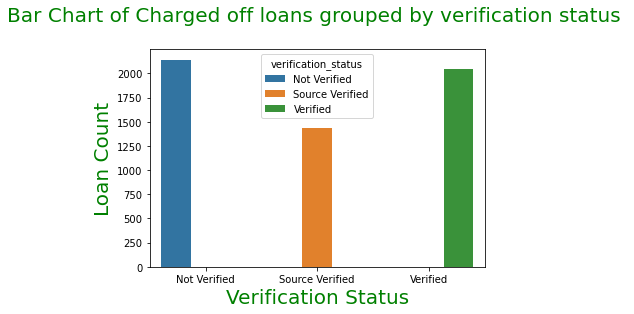

In [45]:
#Bar chart for count of Charged off loans based on verification status
Loandata_defaulters_grades=LoanData_defaulters.groupby(['verification_status']).agg(count_total=("loan_status",'count'))
Loandata_defaulters_grades.reset_index(inplace=True)
sns.barplot(data=Loandata_defaulters_grades, x= "verification_status", y= "count_total",hue="verification_status")
plt.title("Bar Chart of Charged off loans grouped by verification status \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Verification Status",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()


#### Univariate Analysis (Quantitative variable)- Loan count distribution for Interest rate for defaulters

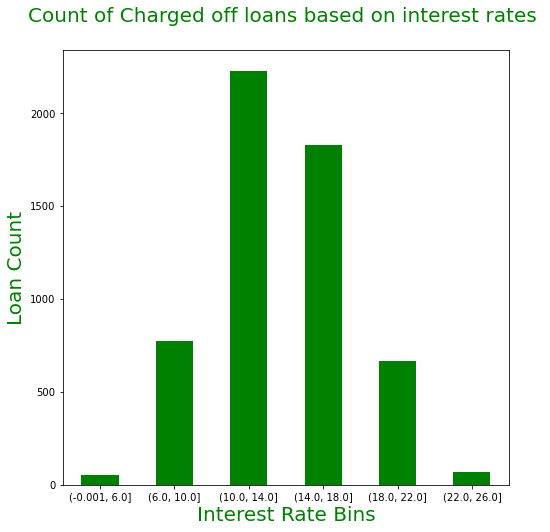

In [47]:
# Dividing the interest rate to bins and analyzing 
bins_interest=[0,6,10,14,18,22,26]
out=pd.cut(LoanData_defaulters["int_rate_percent"],bins=[0,6,10,14,18,22,26],include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="green", figsize=(8,8))
plt.title("Count of Charged off loans based on interest rates \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Interest Rate Bins",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

#### Univariate Analysis (Quantitative variable)- Loan count distribution for Loan Amount for defaulters

In [49]:
LoanData_defaulters["loan_amnt"].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

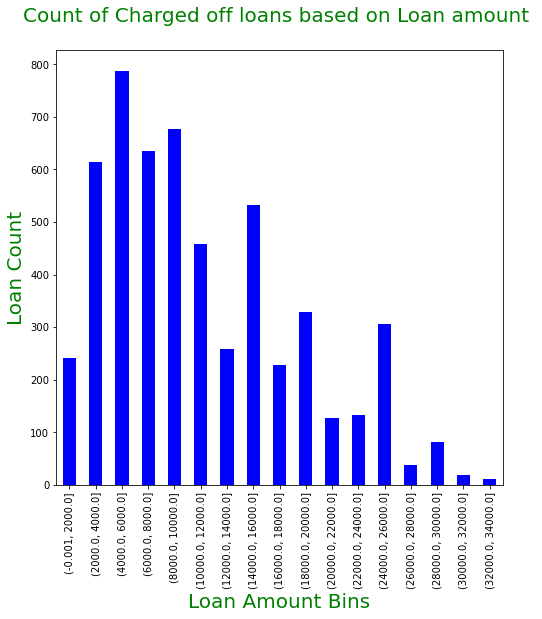

In [50]:
# Dviding Loan amount into bins and analyzing the Charged off loans
out=pd.cut(LoanData_defaulters["loan_amnt"],bins=np.arange(0,35000,2000),include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="blue", figsize=(8,8))
plt.title("Count of Charged off loans based on Loan amount \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Loan Amount Bins",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xticks(rotation=90)
plt.show()

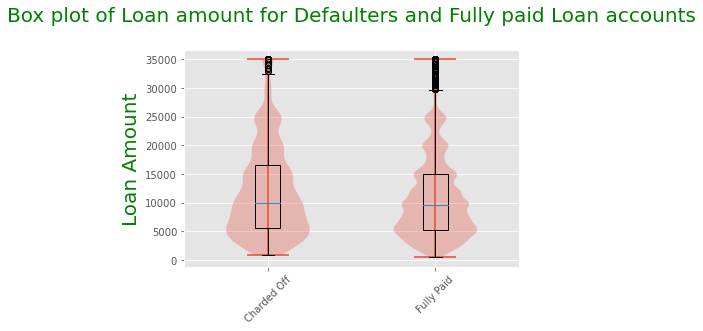

In [51]:
# Box plot of Loan amount vs Loan Status (Charged off and Fully Paid)
plt.style.use("ggplot")
plt.boxplot([LoanData_defaulters["loan_amnt"],LoanData_Fullpaid["loan_amnt"]])
plt.title("Box plot of Loan amount for Defaulters and Fully paid Loan accounts\n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
#plt.xlabel("Loan",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Amount",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xticks([1, 2], ['Charded Off', 'Fully Paid'], rotation=45)
plt.violinplot([LoanData_defaulters["loan_amnt"],LoanData_Fullpaid["loan_amnt"]])
plt.show()


# Segmented Univariate analysis

In [53]:
#Based home Ownership 
LoanData_defaulters.home_ownership.value_counts()

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

In [54]:
# Home ownership with Other value is very minimal ,hence ignoring those records and performing an analysis
LoanData_defaulters[LoanData_defaulters["home_ownership"]!='OTHER'].home_ownership.value_counts()

RENT        2839
MORTGAGE    2327
OWN          443
Name: home_ownership, dtype: int64

#### Segmented  Analysis- Loan applications distribution over Home Ownership for Charged off loans

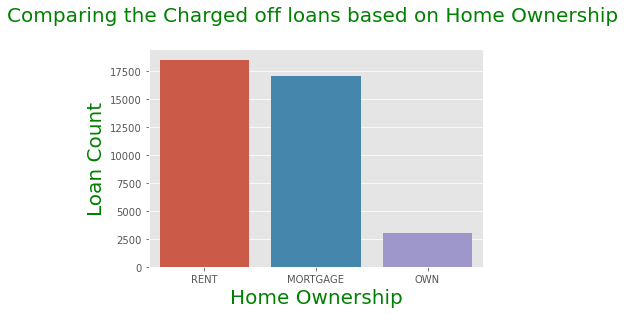

In [55]:
plt.title("Comparing the Charged off loans based on Home Ownership \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
sns.countplot(data=LoanData, x='home_ownership', order=LoanData_defaulters[LoanData_defaulters["home_ownership"]!='OTHER'].home_ownership.value_counts().index)
plt.xlabel("Home Ownership",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

#### Segmented  Analysis- Loan applications distribution over loan status on grade

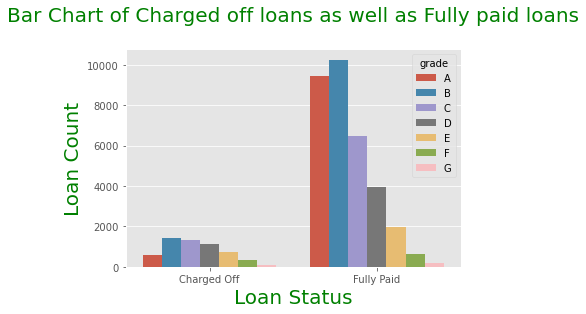

In [57]:
# Bar chart of Charged off loans based on grade
Loandata_grades=LoanData.groupby(['loan_status','grade']).agg(count_total=("loan_status",'count'))
Loandata_grades.reset_index(inplace=True)
sns.barplot(data=Loandata_grades, x= "loan_status", y= "count_total",hue="grade")
plt.title("Bar Chart of Charged off loans as well as Fully paid loans\n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Loan Status",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

#### Segmented  Analysis- Loan applications distribution over loan status on state

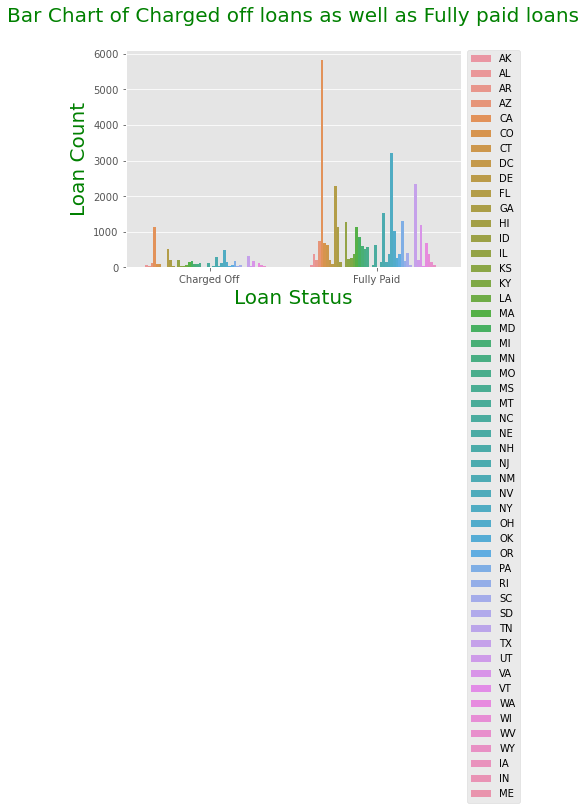

In [96]:
# Bar chart of Charged off loans based on state
Loandata_grades=LoanData.groupby(['loan_status','addr_state']).agg(count_total=("loan_status",'count'))
Loandata_grades.reset_index(inplace=True)
sns.barplot(data=Loandata_grades, x= "loan_status", y= "count_total",hue="addr_state")
plt.title("Bar Chart of Charged off loans as well as Fully paid loans\n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Loan Status",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [60]:
LoanData.term_months.value_counts()

36    29096
60     9481
Name: term_months, dtype: int64

#### Bar Chart of Loan applications versus Loan term

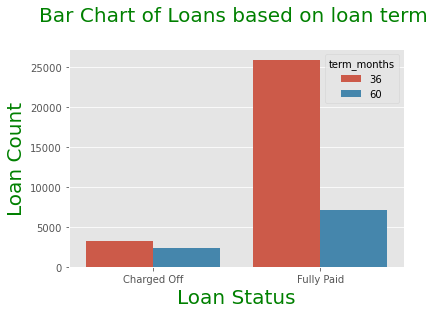

In [98]:
# Bar chart of loans based on loan term
Loandata_term=LoanData.groupby(['loan_status','term_months']).agg(count_total=("loan_status",'count'))
Loandata_term.reset_index(inplace=True)
sns.barplot(data=Loandata_term, x= "loan_status", y= "count_total",hue="term_months")
plt.title("Bar Chart of Loans based on loan term \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Loan Status",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

#### Based on above bar chart, we have lot of applications with 36 month term loan, hence increasing the interest percent on short term loans would be profitable. 


#### Bar chart of Charged off loans vs dti( dti bins)
###### A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [104]:
# dti ordered segemtned analysis 
LoanData_defaulters["dti"].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

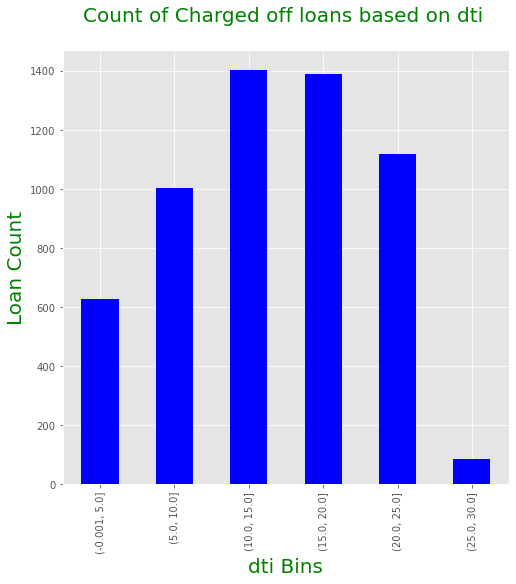

In [106]:
out=pd.cut(LoanData_defaulters["dti"],bins=np.arange(0,35,5),include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="blue", figsize=(8,8))
plt.title("Count of Charged off loans based on dti \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("dti Bins",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xticks(rotation=90)
plt.show()

# Bivariate analysis

In [64]:
# Correlation box for all the loan data 
Loan_corr=LoanData[["loan_amnt","term_months","int_rate_percent","annual_inc","dti"]].corr()
Loan_corr

,loan_amnt,term_months,int_rate_percent,annual_inc,dti
loan_amnt,1.000000,0.346650,0.301265,0.268999,0.062436
term_months,0.346650,1.000000,0.440206,0.043866,0.076182
int_rate_percent,0.301265,0.440206,1.000000,0.048899,0.110913
annual_inc,0.268999,0.043866,0.048899,1.000000,-0.121530
dti,0.062436,0.076182,0.110913,-0.121530,1.000000


In [91]:
# Correlation box for the charged off loans
Loan_corr_chargedoff=LoanData_defaulters[["loan_amnt","term_months","int_rate_percent","annual_inc","dti"]].corr()
Loan_corr_chargedoff

,loan_amnt,term_months,int_rate_percent,annual_inc,dti
loan_amnt,1.000000,0.389484,0.351216,0.352359,0.063872
term_months,0.389484,1.000000,0.455916,0.079099,0.063872
int_rate_percent,0.351216,0.455916,1.000000,0.132252,0.040607
annual_inc,0.352359,0.079099,0.132252,1.000000,-0.089725
dti,0.063872,0.063872,0.040607,-0.089725,1.000000


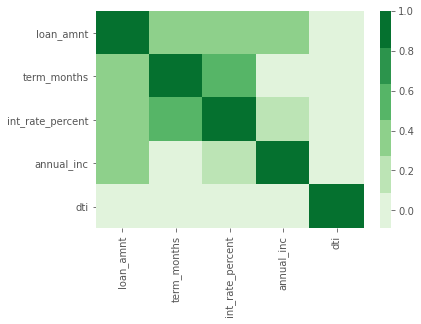

In [92]:
colormap = sns.color_palette("Greens")
sns.heatmap(Loan_corr_chargedoff,cmap=colormap);

In [66]:
# Correlation box for few of the columns for the fully paid loans
LoanData_Fullpaid[["loan_amnt","term_months","int_rate_percent","annual_inc","dti"]].corr()

,loan_amnt,term_months,int_rate_percent,annual_inc,dti
loan_amnt,1.000000,0.331336,0.285371,0.264433,0.059256
term_months,0.331336,1.000000,0.412617,0.048657,0.070857
int_rate_percent,0.285371,0.412617,1.000000,0.050188,0.114644
annual_inc,0.264433,0.048657,0.050188,1.000000,-0.124211
dti,0.059256,0.070857,0.114644,-0.124211,1.000000


In [67]:
# Correlation box for few of the columns for the charged off loans
LoanData_defaulters[["loan_amnt","term_months","int_rate_percent","annual_inc","dti"]].corr()

,loan_amnt,term_months,int_rate_percent,annual_inc,dti
loan_amnt,1.000000,0.389484,0.351216,0.352359,0.063872
term_months,0.389484,1.000000,0.455916,0.079099,0.063872
int_rate_percent,0.351216,0.455916,1.000000,0.132252,0.040607
annual_inc,0.352359,0.079099,0.132252,1.000000,-0.089725
dti,0.063872,0.063872,0.040607,-0.089725,1.000000


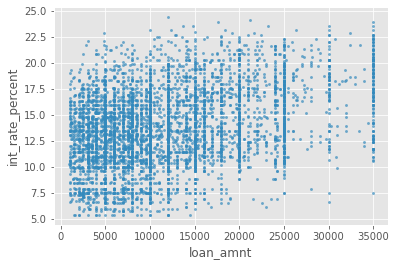

In [68]:
# loan_status vs ( loan amount and interest ) continuous

#plt.scatter(x,y, alpha=0.7, s=n)
LoanData_defaulters.plot.scatter(x = 'loan_amnt', y = 'int_rate_percent',alpha=0.7, s = 5);


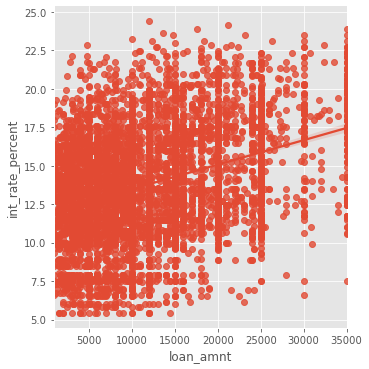

In [69]:
sns.lmplot(x="loan_amnt", y="int_rate_percent" , data=LoanData_defaulters);

In [70]:
LoanData_defaulters["annual_inc"]

1         30000.0
8         40000.0
9         15000.0
12        30000.0
14       100000.0
           ...   
39667     32000.0
39668     75000.0
39669    213000.0
39678     33990.0
39688    145000.0
Name: annual_inc, Length: 5627, dtype: float64

In [71]:
LoanData_defaulters[LoanData_defaulters.annual_inc < LoanData_defaulters.annual_inc.quantile(.75)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate_percent,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,152.39,2012-08-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,121.45,2013-03-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,...,305.38,2012-11-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
26,1069800,1304679,15000,15000,8725.0,36,14.27,514.64,C,C2,...,0.00,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,127830,127824,8000,8000,150.0,36,12.17,266.37,D,D2,...,266.37,2010-05-01,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0
39652,123230,80353,3175,3175,1425.0,36,11.54,104.76,C,C5,...,104.76,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0
39666,119043,119040,15450,15450,600.0,36,11.22,507.46,C,C4,...,1016.15,2010-03-01,NaN,1,INDIVIDUAL,0,NaN,0,1.0,0.0
39667,118823,118026,2500,2500,675.0,36,12.80,84.00,D,D4,...,1.76,2016-05-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0


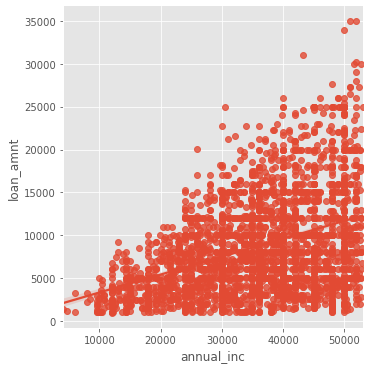

In [93]:
sns.lmplot(x="annual_inc", y="loan_amnt" , data=LoanData_defaulters[LoanData_defaulters.annual_inc < LoanData_defaulters.annual_inc.quantile(.75)]);

# Derived metrics 
 - Month and Year
 - Loan Amount/ Annual income ratio


In [76]:
# Adding dervied column year and month
LoanData["year"]=pd.DatetimeIndex(LoanData["issue_d"]).year
LoanData["month"]=pd.DatetimeIndex(LoanData["issue_d"]).month
LoanData_defaulters["year"]=pd.DatetimeIndex(LoanData_defaulters["issue_d"]).year
LoanData_defaulters["month"]=pd.DatetimeIndex(LoanData_defaulters["issue_d"]).month
LoanData_Fullpaid["year"]=pd.DatetimeIndex(LoanData_Fullpaid["issue_d"]).year
LoanData_Fullpaid["month"]=pd.DatetimeIndex(LoanData_Fullpaid["issue_d"]).month



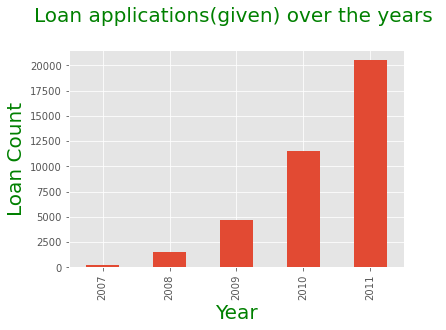

In [94]:
# Plotting graph of Loan applications 

LoanData.groupby(['year'])['issue_d'].count().plot.bar()
plt.title("Loan applications(given) over the years \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Year",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()



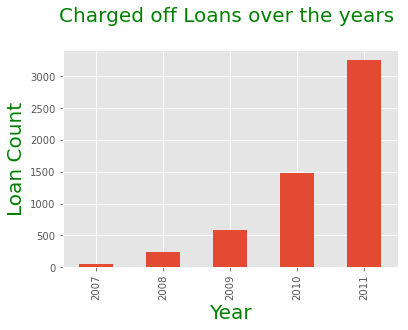

In [78]:
# Checking Charged off loans

LoanData_defaulters.groupby(['year'])['issue_d'].count().plot.bar()
plt.title("Charged off Loans over the years \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Year",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()


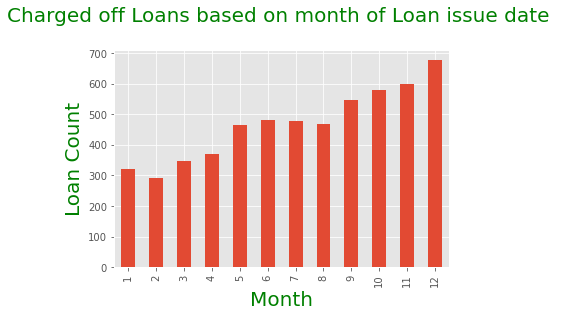

In [79]:
#Charged off loans based on month 
LoanData_defaulters.groupby(['month'])['issue_d'].count().plot.bar()
plt.title("Charged off Loans based on month of Loan issue date \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Month",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()


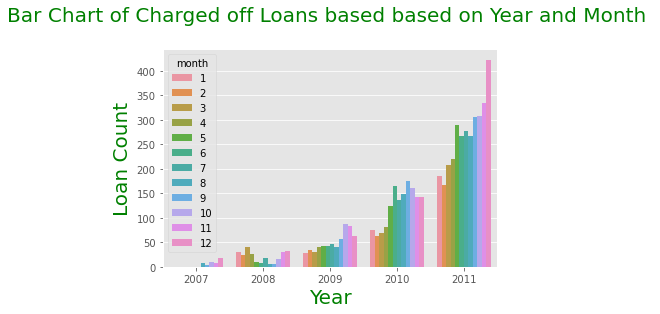

In [80]:
#Charged off loans year and month based 
Loandata_yearmonth=LoanData_defaulters.groupby(['year','month']).agg(count_total=("loan_status",'count'))
Loandata_yearmonth.reset_index(inplace=True)
sns.barplot(data=Loandata_yearmonth, x= "year", y= "count_total",hue="month")
plt.title("Bar Chart of Charged off Loans based based on Year and Month \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xlabel("Year",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.ylabel("Loan Count",fontdict={'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()